In [72]:
import xgboost as xgb
import pandas as pd
import numpy as np

from src.features import build_features as f
from importlib import reload
reload(f)

vladdy = 665489
soto = 665742
schneider = 676914
biggio = 624415
batter = schneider

X_train, y_train, X_test, y_test, encoders = f.get_pitch_outcome_dataset_xgb(batter, split=True)

In [80]:
def fit_and_test_xgboost(batter_id, target_col):
    X_train, y_train, X_test, y_test, encoders = f.get_pitch_outcome_dataset_xgb(batter, split=True)
    # Define the parameter grid
    param_grid = {
        'learning_rate': [0.1],
        'max_depth': [2, 3],
        'n_estimators': [200, 300],
        'lambda': [0.1, 0.5, 1.0],          # L2 regularization term
        'alpha': [0, 0.1, 0.5],             # L1 regularization term
        #'min_child_weight': [1, 5, 10]      # Minimum sum of instance weight (hessian)
    }

    clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='neg_log_loss', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    best_clf = grid_search.best_estimator_
    best_clf.fit(X_train, y_train)
    clf = best_clf
    
    xgb_loglik = compute_xgboost_loglik(clf.predict_proba(X_test), y_test, target_col)
    cat_loglik = compute_cat_loglik(X_train, y_train, y_test, target_col)
    print(f'XGB: {xgb_loglik:.2f}, CAT: {cat_loglik:.2f}')
    print(f"Train Accuracy: {accuracy_score(y_train, clf.predict(X_train)):.3f}")
    print(f"Train Accuracy: {accuracy_score(y_test, clf.predict(X_test)):.3f}")

for batter in [vladdy, soto, schneider, biggio]:
    fit_and_test_xgboost(batter, 'pitch_outcome')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'alpha': 0.1, 'lambda': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGB: -982.15, CAT: -1534.07
Train Accuracy: 0.6628867960791851
Test Accuracy: 0.6214347450302506
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'alpha': 0.5, 'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGB: -1210.34, CAT: -1984.45
Train Accuracy: 0.7034336954144492
Test Accuracy: 0.6695081967213115
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'alpha': 0.5, 'lambda': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
XGB: -103.99, CAT: -156.08
Train Accuracy: 0.8165399239543726
Test Accuracy: 0.6752136752136753
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'alpha': 0.5, 'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGB: -603.74, CAT: -1007.41
Train Acc

In [94]:
from sklearn.utils import class_weight
def fit_and_test_xgboost(batter_id, target_col):
    X_train, y_train, X_test, y_test, encoders = f.get_pitch_outcome_dataset_xgb(batter, split=True)
    # Define the parameter grid
    param_grid = {
        'learning_rate': [0.1],
        'max_depth': [2, 3],
        'n_estimators': [200, 300],
        'lambda': [0.1, 0.5, 1.0],          # L2 regularization term
        'alpha': [0, 0.1, 0.5],             # L1 regularization term
        #'min_child_weight': [1, 5, 10]      # Minimum sum of instance weight (hessian)
    }

    param_grid = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [2,3],
        'n_estimators': [100, 200],
        'min_child_weight': [1],
        'gamma': [0.1],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'reg_alpha': [0],
        'reg_lambda': [1]
    }


    #class_weights = class_weight.compute_sample_weight(
    #    class_weight='balanced',
    #    y=y_train[target_col]
    #)

    clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')
    
    #clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='neg_log_loss', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train) #, sample_weight=class_weights)
    print("Best Parameters:", grid_search.best_params_)
    best_clf = grid_search.best_estimator_
    best_clf.fit(X_train, y_train) #, sample_weight=class_weights)
    clf = best_clf
    
    xgb_loglik = compute_xgboost_loglik(clf.predict_proba(X_test), y_test, target_col)
    cat_loglik = compute_cat_loglik(X_train, y_train, y_test, target_col)
    print(f'XGB: {xgb_loglik:.2f}, CAT: {cat_loglik:.2f}')
    print(f"Train Accuracy: {accuracy_score(y_train, clf.predict(X_train)):.3f}")
    print(f"Train Accuracy: {accuracy_score(y_test, clf.predict(X_test)):.3f}")

for batter in [vladdy, soto, schneider, biggio]:
    fit_and_test_xgboost(batter, 'pitch_outcome')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
XGB: -976.29, CAT: -1534.07
Train Accuracy: 0.673
Train Accuracy: 0.615
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
XGB: -1208.75, CAT: -1984.45
Train Accuracy: 0.707
Train Accuracy: 0.665
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
XGB: -103.05, CAT: -156.08
Train Accuracy: 0.860
Train Accuracy: 0.632
Fitting 5 folds for each of 8 cand

In [73]:
label_mappings = encoders['pitch_outcome'].classes_
for idx, label in enumerate(label_mappings):
    print(idx, label)

0 ball
1 foul
2 hit_by_pitch
3 hit_into_play
4 strike


In [74]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1],
    'max_depth': [2, 3],
    'n_estimators': [200, 300],
    'lambda': [0.1, 0.5, 1.0],          # L2 regularization term
    'alpha': [0, 0.1, 0.5],             # L1 regularization term
    #'min_child_weight': [1, 5, 10]      # Minimum sum of instance weight (hessian)
}

# Initialize XGBoost classifier
clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='neg_log_loss', verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_clf = grid_search.best_estimator_

# Fit the best model on the training data
best_clf.fit(X_train, y_train)

clf = best_clf

#Best Parameters: {'alpha': 0.5, 'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
#Best Parameters: {'alpha': 0.5, 'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'alpha': 0.5, 'lambda': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}


In [42]:
params = {
    'objective' : 'multi:softprob',
    'eval_metric': 'mlogloss',      
    'learning_rate': 0.1,
    'max_depth': 3, 
    'n_estimators': 200
}
clf = xgb.XGBClassifier(**params)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

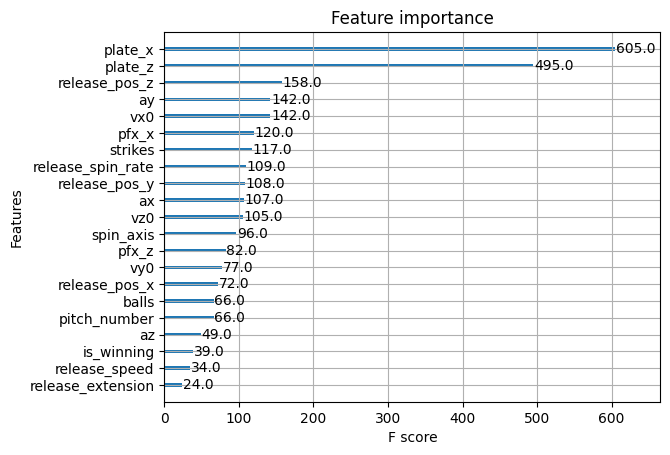

In [75]:
xgb.plot_importance(clf)

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.8165399239543726
Accuracy: 0.6752136752136753


In [77]:
def compute_xgboost_loglik(y_pred_proba, y_test, target_col):
    loglik = 0
    for idx, target in enumerate(y_test[target_col]):
        loglik += np.log(y_pred_proba[idx, target])
    return loglik

def compute_cat_loglik(X_train, y_train, y_test, target_col):

    df = pd.concat([X_train, y_train], axis=1)
    
    pitch_cat_prob = (df[target_col].value_counts() / len(df)) #.reset_index()
    #pitch_cat_prob[f'{target_col}_encoded'] = encoders[target_col].transform(pitch_cat_prob[target_col])
    #pitch_cat_prob.set_index(f'{target_col}_encoded')
    
    loglik = 0
    for target in y_test[target_col]:
        loglik += np.log(pitch_cat_prob.loc[target])
    return loglik

target_col = 'pitch_outcome'
xgb_loglik = compute_xgboost_loglik(clf.predict_proba(X_test), y_test, target_col)
cat_loglik = compute_cat_loglik(X_train, y_train, y_test, target_col)
print(f'XGB: {xgb_loglik:.2f}, CAT: {cat_loglik:.2f}')

XGB: -103.99, CAT: -156.08


In [78]:
confusion_matrix(y_test, clf.predict(X_test))

array([[42,  0,  0,  0,  4],
       [ 4,  3,  0,  4, 11],
       [ 0,  1,  0,  0,  0],
       [ 1,  2,  0,  3,  6],
       [ 3,  0,  0,  2, 31]])

In [ ]:
import shap
import xgboost as xgb

# Assuming you have already trained an XGBoost classification model
#model = xgb.XGBClassifier()
#model.fit(X_train, y_train)

# Create an explainer object
explainer = shap.Explainer(clf)

# Calculate SHAP values for a subset of the data (e.g., validation set)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
#shap.summary_plot(shap_values, X_train, plot_type='dot', show=False)
background = shap.maskers.Independent(X_test, max_samples=100)
explainer = shap.Explainer(clf, background)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

In [122]:
# Define feature names
feature_names = X_train.columns.tolist()  # Assuming X_train is a DataFrame

# Create an explainer object with background data
background = shap.maskers.Independent(X_test, max_samples=100)
explainer = shap.Explainer(clf, background, feature_names=feature_names)

# Calculate SHAP values for test data
shap_values = explainer(X_test)

# Visualize variable importance using a SHAP bar plot

100%|===================| 19194/19205 [03:13<00:00]        

IndexError: list index out of range

In [123]:
shap.plots.bar(shap_values, feature_names=feature_names)

TypeError: bar() got an unexpected keyword argument 'feature_names'

In [124]:
feature_names = X_train.columns.tolist()  # Assuming X_train is a DataFrame
print(feature_names)
# Create an explainer object with background data
background = shap.maskers.Independent(X_test, max_samples=100)
explainer = shap.Explainer(clf, X_train, feature_names=feature_names)

# Calculate SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Visualize variable importance using a SHAP bar plot
shap.plots.bar(shap_values)

['pitch_type', 'p_throws', 'strikes', 'balls', 'plate_x', 'plate_z']


100%|===================| 19150/19205 [03:15<00:00]        

TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!